Dynamical system plotting using the following resources:
http://be150.caltech.edu/2017/handouts/dynamical_systems_approaches.html
http://systems-sciences.uni-graz.at/etextbook/sw2/phpl_python.html
https://tonysyu.github.io/animating-particles-in-a-flow.html
https://www.allendowney.com/blog/2019/07/25/matplotlib-animation-in-jupyter/
https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation

Animations do not work in Jupyter lab, open with notebook!

In [13]:
import numpy as np
import scipy.integrate
import scipy.optimize

# Plotting modules
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML,clear_output
from time import sleep

In [14]:
import sympy as sm
# define the system in this way (asuming a predator-prey-system with no negative values)
# to avoid interference x = r (for resource) and y = c (for consumer) 
u, v = sm.symbols('u, v', negative=False)
###Equations of motion
a,b=2,2
U = sm.lambdify([u,v], v+u-u**3/3,["numpy"])
V = sm.lambdify([u,v], -(u-a+b*v),["numpy"])

# use sympy's way of setting equations to zero
UEqual = sm.Eq(U(u,v), 0)
VEqual = sm.Eq(V(u,v), 0)

# compute fixed points
fp=sm.solve( (UEqual, VEqual), u, v )
unc=sm.solve( UEqual, u, v )
vnc=sm.solve( VEqual, u, v )

uncfunc = sm.lambdify([u,v], unc[0],["numpy"])
vncfunc = sm.lambdify([u,v], vnc[0],["numpy"])

def Sys(X, t=0):
    # here X[0] = x and x[1] = y
    return np.array([ U(*X) , V(*X) ])

<IPython.core.display.Javascript object>


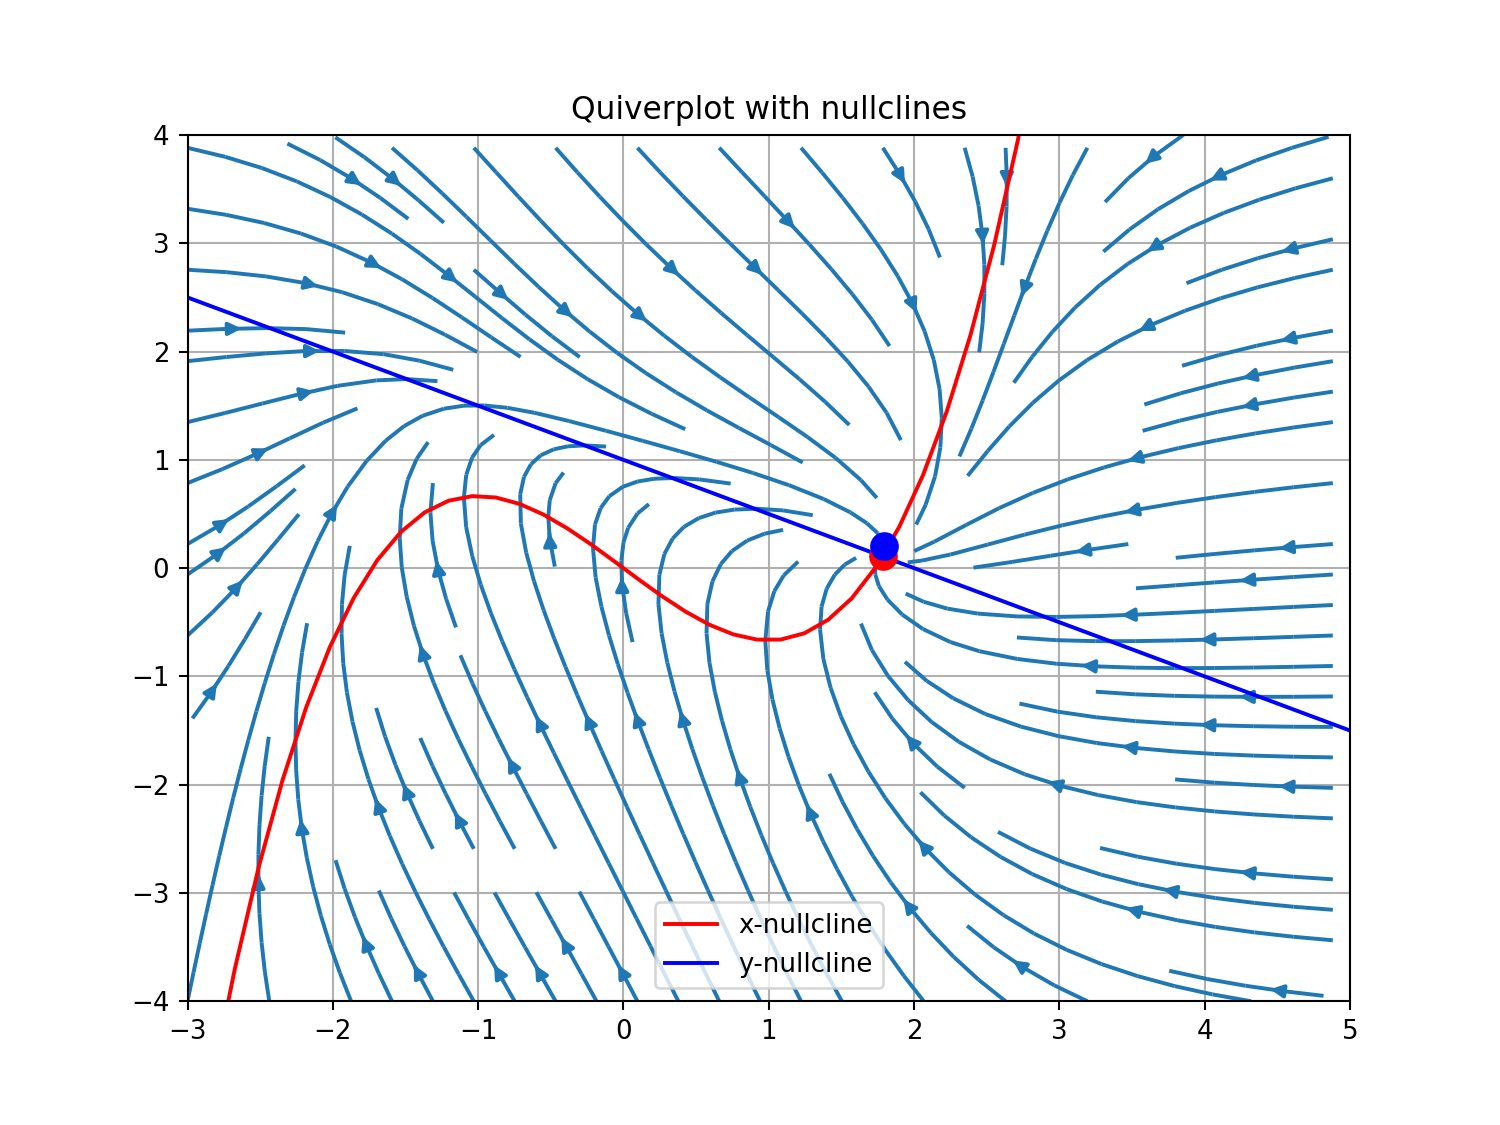

In [33]:
###changes axes ranges and particle initial position
urange=[-3,5]
vrange=[-4,4]
particle_start=[.4,.5]
#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

x = np.linspace(*urange)
y = np.linspace(*vrange)

# plot nullclines
ax4.plot(x,np.array(uncfunc(x,y))[1], 'r-',  label='x-nullcline')
ax4.plot( vncfunc(x,y)[0],y, 'b-',  label='y-nullcline')

# plot fixed points
for point in fp:
    try:
        ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
    except TypeError:
        pass
ax4.set_title("Quiverplot with nullclines")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
# x = np.linspace(0, 2, 20)
# y = np.linspace(0, 2, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
# M = (np.hypot(DX1, DY1))                        # norm growth rate 
# M[ M == 0] = 1.                                 # avoid zero division errors 
# DX1 /= M                                        # normalize each arrows
# DY1 /= M

ax4.streamplot(X1, Y1, DX1, DY1)
ax4.legend()
ax4.set_xlim(urange)
ax4.set_ylim(vrange)
ax4.grid()

###Add particle
point, = ax4.plot([], [], "blue", marker = "o", markersize = 10.0)
def init():
    point.set_data(*particle_start)
    return point,

# animation function.  This is called sequentially
def animate(i):
    curr = point.get_data()
    vel = np.array([U(*curr),V(*curr)])/100
    point.set_data(*(curr+vel))
    return point,

anim = FuncAnimation(fig2, animate, init_func=init,
                               frames=200, interval=1, blit=True,save_count=10)
plt.show()